## Starter Code to Familiarize with TN1 Problem Set 2

Authored by: Moritz Schwerdt
mail: schwerdt@fias.uni-frankfurt.de

Task 1:
A Poisson distribution describes the probability of a given number of events occurring in a fixed interval of time or space, assuming:

1. Events occur independently.
2. The average rate of occurrence $\lambda$ is constant.
3. Multiple events cannot occur simultaneously.

## NumPy starter:

numpy is a very useful Python Package that allows for efficient CPU based Scientific Computing.<br>
Underlying Code is implemented in C/C++ which speeds up computation.<br>
The Notations for functions and concepts such as **broadcasting** are commonly adapted in other Packages such as Pytorch or JAX.<br>

In [3]:
#making sure that numpy is installed
!pip install numpy
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 8.6 MB/s  0:00:00 eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 7.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.version

<module 'numpy.version' from '/opt/homebrew/anaconda3/envs/jax_metal/lib/python3.11/site-packages/numpy/version.py'>

In [31]:
# Creaing Arrays and shape
a = np.array([1, 2, 3])
b = np.array([[1, 2, 3],
              [4, 5, 6]])

print("Array a:", a)
print("Shape of a:", a.shape)

print("\nArray b:\n", b)
print("Shape of b:", b.shape)

Array a: [1 2 3]
Shape of a: (3,)

Array b:
 [[1 2 3]
 [4 5 6]]
Shape of b: (2, 3)


In [32]:
# Summing along different axes
print("Sum of all elements in b:", np.sum(b))
print("Sum along axis=0 (columns):", np.sum(b, axis=0))
print("Sum along axis=1 (rows):", np.sum(b, axis=1))


Sum of all elements in b: 21
Sum along axis=0 (columns): [5 7 9]
Sum along axis=1 (rows): [ 6 15]


In [33]:
x = np.array([1, 2, 3])
y = np.array([[10], [20], [30]])

# Broadcast addition: (3,) + (3,1) -> (3,3)
result = x + y

print("x shape:", x.shape)
print("y shape:", y.shape)
print("Result shape:", result.shape)
print("\nResult:\n", result)


x shape: (3,)
y shape: (3, 1)
Result shape: (3, 3)

Result:
 [[11 12 13]
 [21 22 23]
 [31 32 33]]


# Simulating Random Events — A Gentle Introduction

Before we simulate neuronal spikes from a Poisson process, let's warm up with a simpler exercise that demonstrates the *same techniques* we’ll later use.

In this mock example, we’ll:
- Simulate **random coin flips over time** (a Bernoulli process).
- Collect these results into **bins** and compute their statistics.
- Visualize the **distribution of time intervals** between "heads".


These steps use:
- Random number generation (`numpy`)
- Boolean masking and array operations
- Binning and counting
- Variance-to-mean ratios (similar to the **Fano factor**)
- Histograms and coefficient-of-variation calculations

In [8]:
# Defining a array from 0 to T with timesteps in ms

times  = np.arange(0, 10, 0.001)
print(f'displaying first 10 items inside of the array times:{times[:10]}')
print(f'displaying the dimensions of the array{times.shape}')

displaying first 10 items inside of the array times:[0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009]
displaying the dimensions of the array(10000,)


In [9]:
random_vals = np.random.rand(times.shape[0])
print(random_vals)

[0.82513375 0.80396769 0.17715985 ... 0.12606265 0.88991892 0.25311738]


In [11]:
# Checking if Value is smaller than a value
heads = random_vals < 0.3
heads

array([False, False,  True, ...,  True, False,  True], shape=(10000,))

In [14]:
head_times = times[heads]
print(f'Timestep that a head was thrown:{head_times[:10]}')
print(f'amount of times a head was thrown:{head_times.shape[0]}')

Timestep that a head was thrown:[0.002 0.003 0.007 0.008 0.014 0.016 0.018 0.019 0.02  0.026]
amount of times a head was thrown:2946


In [15]:
#Compute Bins and compute Counts per Bin
binned_times = np.arange(0, 10 + 0.5, 0.5)
binned_head_counts, _ = np.histogram(head_times, bins=binned_times)

weighted_mean = np.mean(binned_head_counts)
weighted_var = np.var(binned_head_counts)
ratio =  weighted_var / weighted_mean

print(f"Mean count per bin: {weighted_mean:.3f}")
print(f"Variance-to-mean ratio: {ratio:.3f}")

Mean count per bin: 147.300
Variance-to-mean ratio: 0.910


In [17]:
print(f'times:{binned_times}')
print(f'head_counts{binned_head_counts}')

times:[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]
head_counts[159 137 175 159 146 140 121 145 154 149 140 141 133 158 153 149 141 136
 154 156]


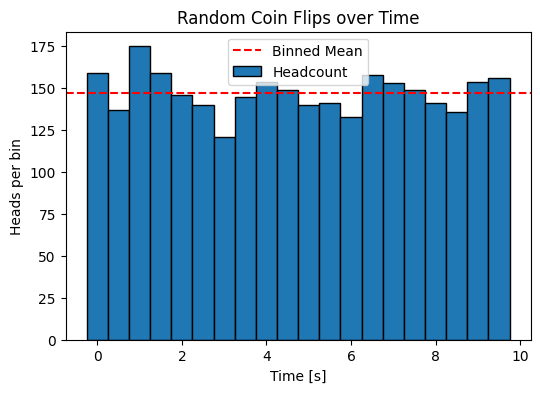

In [23]:
# Displaying Head Count per Bin

plt.figure(figsize=(6, 4))
plt.bar(binned_times[:-1], binned_head_counts,width=0.5, edgecolor='k', alpha=1, label='Headcount')
plt.axhline(weighted_mean, color='red', linestyle='--', label='Binned Mean')
plt.xlabel("Time [s]")
plt.ylabel("Heads per bin")
plt.title("Random Coin Flips over Time")
plt.legend()
plt.show()


Mean interval: 0.0034s, Std: 0.0029s, CV: 0.863


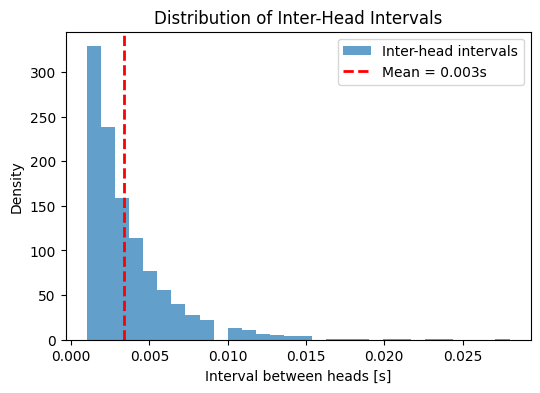

In [30]:
# Compute time intervals between following heads
intervals = np.diff(head_times)

plt.figure(figsize=(6, 4))
plt.hist(intervals, bins=30, density=True, alpha=0.7, label="Inter-head intervals")

# Compute mean, std, and coefficient of variation
mean_int = np.mean(intervals)
std_int = np.std(intervals)
cv = std_int / mean_int


plt.axvline(mean_int, color='r', linestyle='--', linewidth=2,
            label=f"Mean = {mean_int:.3f}s")

plt.xlabel("Interval between heads [s]")
plt.ylabel("Density")
plt.title("Distribution of Inter-Head Intervals")
plt.legend()

print(f"Mean interval: {mean_int:.4f}s, Std: {std_int:.4f}s, CV: {cv:.3f}")
plt.show()


## What we learned

This mini-exercise shows the core techniques you’ll use in the actual Poisson spike simulation:

- **Step-wise random sampling:** generate uniform random numbers and apply a threshold.
- **Event detection:** mark where an event (spike/head) occurs.
- **Binning:** use `numpy.histogram` to count events in equal intervals.
- **Variability metrics:** compute variance-to-mean ratios (analogous to the Fano factor).
- **Inter-event intervals:** analyze timing variability via histograms and coefficient of variation.

In the Poisson spike train task, you'll replace:
- `p_head` → firing probability \( r $ \Delta $ t \) t \)
- "head" → "spike"
- 10 s duration → 20 s simulation
- and use multiple bin sizes (1–100 ms) to evaluate the Fano factor.
